In [3]:
#Displaying the basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   frame_number  19 non-null     int64 
 1   man/woman     19 non-null     object
 2   emotion       19 non-null     object
 3   year          19 non-null     int64 
 4   movie_name    19 non-null     object
dtypes: int64(2), object(3)
memory usage: 892.0+ bytes


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df= pd.read_csv('semusi dataset.csv')
df

,frame_number,man/woman,emotion,year,movie_name
0,98,woman,happy,2008,rab_ne_bana_di_jodi
1,58,man,neutral,2008,rab_ne_bana_di_jodi
2,44,man,neutral,2008,rab_ne_bana_di_jodi
3,96,man,sad,2008,rab_ne_bana_di_jodi
4,71,man,neutral,2008,rab_ne_bana_di_jodi
5,19,woman,neutral,2008,rab_ne_bana_di_jodi
6,76,man,sad,2008,rab_ne_bana_di_jodi
7,35,woman,happy,2008,rab_ne_bana_di_jodi
8,42,man,neutral,2008,rab_ne_bana_di_jodi
9,40,man,neutral,2008,rab_ne_bana_di_jodi


In [4]:
df.shape # Displaying the dimensions of the data

(19, 5)

In [5]:
df.isnull().mean()*100  ##checking for the percentage of data missing in individual column

frame_number    0.0
man/woman       0.0
emotion         0.0
year            0.0
movie_name      0.0
dtype: float64

In [6]:
df.describe()#basic info abt every column

,frame_number,year
count,19.000000,19.0
mean,63.631579,2008.0
std,28.583621,0.0
min,19.000000,2008.0
25%,39.500000,2008.0
50%,58.000000,2008.0
75%,96.500000,2008.0
max,102.000000,2008.0


In [7]:
df.duplicated().sum()#checking for the duplicate rows in the columns

0

In [8]:
df.corr(numeric_only=True)#calculating correla6tion between the columns which contains only numeric value


,frame_number,year
frame_number,1.0,NaN
year,NaN,NaN


In [16]:
# Analyze Gender Distribution
gender_distribution = df['man/woman'].value_counts()
print("\nGender Distribution:")
print(gender_distribution)


Gender Distribution:
man/woman
man      12
woman     7
Name: count, dtype: int64


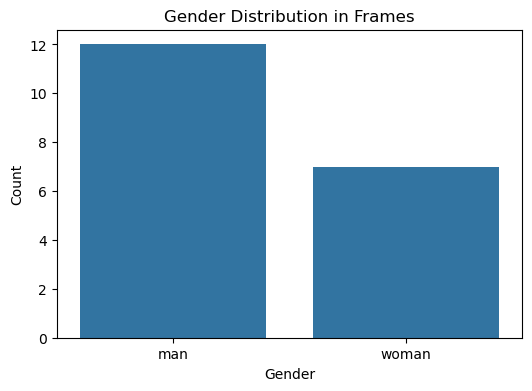

In [18]:
# Visualize Gender Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title("Gender Distribution in Frames")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [19]:
# Analyze Emotion Distribution by Gender
emotion_by_gender = df.groupby(['man/woman', 'emotion']).size().unstack(fill_value=0)
print("\nEmotion Distribution by Gender:")
print(emotion_by_gender)


Emotion Distribution by Gender:
emotion    angry  happy  neutral  sad
man/woman                            
man            0      1        9    2
woman          1      3        1    2


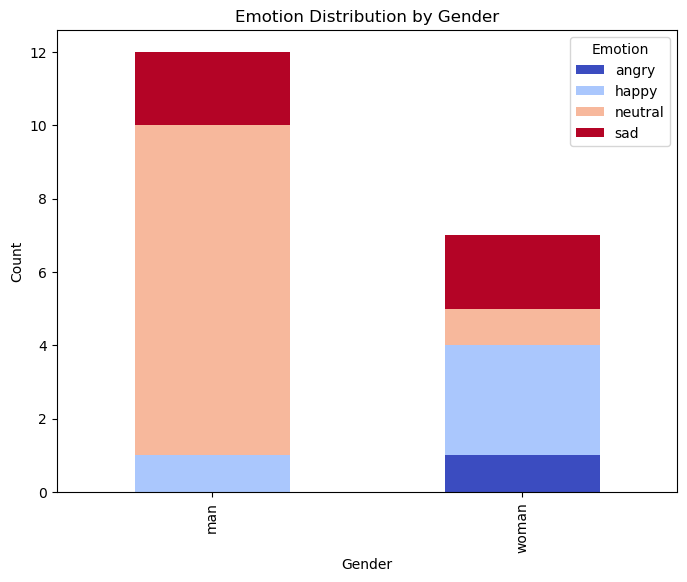

In [20]:
# Visualize Emotion Distribution
emotion_by_gender.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="coolwarm")
plt.title("Emotion Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Emotion")
plt.show()

In [23]:
# Prepare Data for Machine Learning
# Create features and target variable
df['gender'] = df['man/woman'].apply(lambda x: 0 if x == 'man' else 1)  # Encode 'man' as 0, 'woman' as 1
X = pd.get_dummies(df[['emotion', 'year']], drop_first=True)  # One-hot encode 'emotion'
y = df['gender']


In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
from sklearn.metrics import classification_report

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Use zero_division=0 to avoid warnings



Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



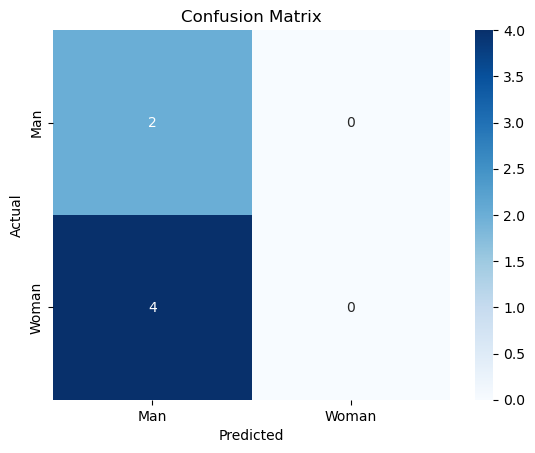

In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Man', 'Woman'], yticklabels=['Man', 'Woman'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()